In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive

In [2]:
table = NasaExoplanetArchive.get_confirmed_planets_table(all_columns=True)

transiting = table[table['pl_discmethod'] == 'Transit']

In [3]:
import astropy.units as u

# oscillation parameters
m_star = transiting['st_mass']
r_star = transiting['st_rad']
teff = transiting['st_teff']
tau_max_solar = 5.34 * u.min

# transiting parameters
period = transiting['pl_orbper']
a_rs = transiting['pl_ratdor']
rp_rs = transiting['pl_ratror']
b = transiting['pl_imppar']

In [4]:
from astropy.constants import R_sun, M_sun

tau_ing = (period * rp_rs / np.pi / np.sqrt(1-b**2) / a_rs).to(u.min)

tau_max = ((r_star/R_sun)**2 * (teff/(5777 * u.K))**0.5 * (M_sun/ m_star) * tau_max_solar).to(u.min)

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bmmorris/anaconda/lib/python3.5/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/bmmorris/anaconda/lib/python3.5/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/bmmorris/anaconda/lib/python3.5/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


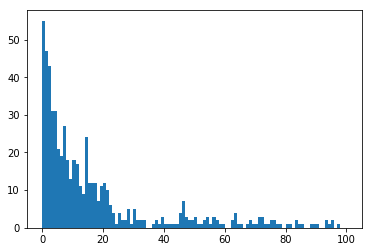

In [5]:
abs_diff = np.abs(tau_ing.value - tau_max.value)
plt.hist(abs_diff, bins=100, range=[0, 100]);

In [6]:
from astropy.table import Column
transiting.add_column(Column(abs_diff, 'abs_diff'))
transiting.add_column(Column(tau_ing.value, 'tau_ing'))
transiting.add_column(Column(tau_max.value, 'tau_max'))

In [7]:
transiting.add_index('NAME_LOWERCASE')

In [52]:
eff_temp_range = teff > 4777 * u.K
gmag_range = transiting['gaia_gmag'] < 9

In [53]:
transiting[eff_temp_range & gmag_range]['pl_name'][np.argsort(abs_diff[eff_temp_range & gmag_range])].data.data

array(['HD 106315 c', 'Kepler-444 f', 'HIP 41378 b', 'pi Men c',
       'HD 3167 b', 'KELT-9 b', 'Kepler-444 d', 'Kepler-444 e',
       'Kepler-444 c', 'Kepler-444 b', 'HD 106315 b', 'KOI-13 b',
       'HIP 41378 c', 'Kepler-14 b', 'HD 3167 c', 'OGLE-TR-132 b',
       'Kepler-1653 b', 'Kepler-21 b', 'K2-263 b', 'OGLE-TR-111 b',
       'KELT-20 b', 'K2-167 b', 'KELT-2 A b', 'KELT-7 b', 'WASP-33 b',
       'KELT-11 b', 'MASCARA-1 b', 'HIP 41378 e', 'HIP 41378 f',
       'HIP 41378 d', 'Kepler-1079 b', 'HAT-P-2 b', 'Kepler-408 b',
       'Kepler-633 b', 'Kepler-1433 b', 'OGLE-TR-10 b', 'Kepler-1063 b',
       'Kepler-1031 b', 'Kepler-565 b', 'Kepler-799 b', 'Kepler-938 b',
       'K2-65 b', 'Kepler-632 b', 'Kepler-515 b', 'Kepler-636 b',
       'OGLE-TR-113 b', 'Kepler-477 b', 'Kepler-1006 b', 'Kepler-365 c',
       'Kepler-397 b', 'Kepler-397 c', 'Kepler-132 e', 'Kepler-132 d',
       'Kepler-132 c', 'Kepler-365 b', 'Kepler-132 b', 'OGLE-TR-056 b'],
      dtype='<U29')

In [58]:
#transiting[np.argsort(transiting['abs_diff'])][:100].pprint(max_lines=100, max_width=500)
# pi Men 
transiting.loc['wasp-33b']

ra,st_raerr,st_rah,st_raherr,ra_str,dec,st_decerr,dec_str,st_glon,st_glonerr,st_glat,st_glaterr,st_elon,st_elonerr,st_elat,st_elaterr,st_posn,st_plx,st_plxerr1,st_plxerr2,st_plxlim,st_plxn,st_dist,st_disterr1,st_disterr2,st_distlim,st_distn,st_pmra,st_pmraerr,st_pmralim,st_pmdec,st_pmdecerr,st_pmdeclim,st_pm,st_pmerr,st_pmlim,st_pmn,st_radv,st_radverr1,st_radverr2,st_radvlim,st_radvn,st_uj,st_ujerr,st_ujlim,st_bj,st_bjerr,st_bjlim,st_vj,st_vjerr,st_vjlim,st_rc,st_rcerr,st_rclim,st_ic,st_icerr,st_iclim,st_j,st_jerr,st_jlim,st_h,st_herr,st_hlim,st_k,st_kerr,st_klim,st_wise1,st_wise1err,st_wise1lim,st_wise2,st_wise2err,st_wise2lim,st_wise3,st_wise3err,st_wise3lim,st_wise4,st_wise4err,st_wise4lim,st_irac1,st_irac1err,st_irac1lim,st_irac2,st_irac2err,st_irac2lim,st_irac3,st_irac3err,st_irac3lim,st_irac4,st_irac4err,st_irac4lim,st_mips1,st_mips1err,st_mips1lim,st_mips2,st_mips2err,st_mips2lim,st_mips3,st_mips3err,st_mips3lim,st_iras1,st_iras1err,st_iras1lim,st_iras2,st_iras2err,st_iras2lim,st_iras3,st_iras3err,st_iras3lim,st_iras4,st_iras4err,st_iras4lim,st_optmag,st_optmagerr,st_optmaglim,st_optband,st_photn,st_umbj,st_umbjerr,st_umbjlim,st_bmvj,st_bmvjerr,st_bmvjlim,st_vjmic,st_vjmicerr,st_vjmiclim,st_vjmrc,st_vjmrcerr,st_vjmrclim,st_jmh2,st_jmh2err,st_jmh2lim,st_hmk2,st_hmk2err,st_hmk2lim,st_jmk2,st_jmk2err,st_jmk2lim,st_bmy,st_bmyerr,st_bmylim,st_m1,st_m1err,st_m1lim,st_c1,st_c1err,st_c1lim,st_colorn,st_spstr,st_ssperr,st_splim,st_spn,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffn,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_loggn,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim,st_metfen,st_metratio,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_lumn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radn,st_mass,st_masserr1,st_masserr2,st_masslim,st_massn,st_dens,st_denserr1,st_denserr2,st_denslim,st_densn,st_age,st_ageerr1,st_ageerr2,st_agelim,st_agen,st_vsini,st_vsinierr1,st_vsinierr2,st_vsinilim,st_vsinin,st_acts,st_actserr,st_actslim,st_actsn,st_actr,st_actrerr,st_actrlim,st_actrn,st_actlx,st_actlxerr,st_actlxlim,st_actlxn,st_nts,st_nplc,st_nglc,st_nrvc,st_naxa,st_nimg,st_nspec,hd_name,hip_name,swasp_id,pl_name,pl_hostname,pl_letter,pl_pnum,pl_snum,pl_mnum,pl_status,pl_discmethod,pl_disc,pl_disc_refname,pl_publ_date,pl_facility,pl_telescope,pl_instrument,pl_locale,pl_def_refname,pl_rvflag,pl_imgflag,pl_astflag,pl_tranflag,pl_ttvflag,pl_kepflag,pl_k2flag,pl_nnotes,pl_cbflag,pl_omflag,pl_pelink,pl_edelink,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxn,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbincln,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orbtpern,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenn,pl_orblper,pl_orblpererr1,pl_orblpererr2,pl_orblperlim,pl_orblpern,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_rvampn,pl_conrat,pl_conraterr1,pl_conraterr2,pl_conratlim,pl_conratband,pl_conratn,pl_msinij,pl_msinijerr1,pl_msinijerr2,pl_msinijlim,pl_msinie,pl_msinieerr1,pl_msinieerr2,pl_msinielim,pl_msinin,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_massn,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassn,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_rads,pl_radserr1,pl_radserr2,pl_radslim,pl_radn,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_densn,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_eqtn,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_insoln,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandepn,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,pl_trandurn,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tranmidn,pl_tsystemref,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_impparn,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_occdepn,pl_ratdor,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,p

In [32]:
transiting.loc['wasp-47d']

ra,st_raerr,st_rah,st_raherr,ra_str,dec,st_decerr,dec_str,st_glon,st_glonerr,st_glat,st_glaterr,st_elon,st_elonerr,st_elat,st_elaterr,st_posn,st_plx,st_plxerr1,st_plxerr2,st_plxlim,st_plxn,st_dist,st_disterr1,st_disterr2,st_distlim,st_distn,st_pmra,st_pmraerr,st_pmralim,st_pmdec,st_pmdecerr,st_pmdeclim,st_pm,st_pmerr,st_pmlim,st_pmn,st_radv,st_radverr1,st_radverr2,st_radvlim,st_radvn,st_uj,st_ujerr,st_ujlim,st_bj,st_bjerr,st_bjlim,st_vj,st_vjerr,st_vjlim,st_rc,st_rcerr,st_rclim,st_ic,st_icerr,st_iclim,st_j,st_jerr,st_jlim,st_h,st_herr,st_hlim,st_k,st_kerr,st_klim,st_wise1,st_wise1err,st_wise1lim,st_wise2,st_wise2err,st_wise2lim,st_wise3,st_wise3err,st_wise3lim,st_wise4,st_wise4err,st_wise4lim,st_irac1,st_irac1err,st_irac1lim,st_irac2,st_irac2err,st_irac2lim,st_irac3,st_irac3err,st_irac3lim,st_irac4,st_irac4err,st_irac4lim,st_mips1,st_mips1err,st_mips1lim,st_mips2,st_mips2err,st_mips2lim,st_mips3,st_mips3err,st_mips3lim,st_iras1,st_iras1err,st_iras1lim,st_iras2,st_iras2err,st_iras2lim,st_iras3,st_iras3err,st_iras3lim,st_iras4,st_iras4err,st_iras4lim,st_optmag,st_optmagerr,st_optmaglim,st_optband,st_photn,st_umbj,st_umbjerr,st_umbjlim,st_bmvj,st_bmvjerr,st_bmvjlim,st_vjmic,st_vjmicerr,st_vjmiclim,st_vjmrc,st_vjmrcerr,st_vjmrclim,st_jmh2,st_jmh2err,st_jmh2lim,st_hmk2,st_hmk2err,st_hmk2lim,st_jmk2,st_jmk2err,st_jmk2lim,st_bmy,st_bmyerr,st_bmylim,st_m1,st_m1err,st_m1lim,st_c1,st_c1err,st_c1lim,st_colorn,st_spstr,st_ssperr,st_splim,st_spn,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffn,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_loggn,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim,st_metfen,st_metratio,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_lumn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radn,st_mass,st_masserr1,st_masserr2,st_masslim,st_massn,st_dens,st_denserr1,st_denserr2,st_denslim,st_densn,st_age,st_ageerr1,st_ageerr2,st_agelim,st_agen,st_vsini,st_vsinierr1,st_vsinierr2,st_vsinilim,st_vsinin,st_acts,st_actserr,st_actslim,st_actsn,st_actr,st_actrerr,st_actrlim,st_actrn,st_actlx,st_actlxerr,st_actlxlim,st_actlxn,st_nts,st_nplc,st_nglc,st_nrvc,st_naxa,st_nimg,st_nspec,hd_name,hip_name,swasp_id,pl_name,pl_hostname,pl_letter,pl_pnum,pl_snum,pl_mnum,pl_status,pl_discmethod,pl_disc,pl_disc_refname,pl_publ_date,pl_facility,pl_telescope,pl_instrument,pl_locale,pl_def_refname,pl_rvflag,pl_imgflag,pl_astflag,pl_tranflag,pl_ttvflag,pl_kepflag,pl_k2flag,pl_nnotes,pl_cbflag,pl_omflag,pl_pelink,pl_edelink,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxn,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbincln,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orbtpern,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenn,pl_orblper,pl_orblpererr1,pl_orblpererr2,pl_orblperlim,pl_orblpern,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_rvampn,pl_conrat,pl_conraterr1,pl_conraterr2,pl_conratlim,pl_conratband,pl_conratn,pl_msinij,pl_msinijerr1,pl_msinijerr2,pl_msinijlim,pl_msinie,pl_msinieerr1,pl_msinieerr2,pl_msinielim,pl_msinin,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_massn,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassn,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_rads,pl_radserr1,pl_radserr2,pl_radslim,pl_radn,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_densn,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_eqtn,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_insoln,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandepn,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,pl_trandurn,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tranmidn,pl_tsystemref,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_impparn,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_occdepn,pl_ratdor,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,p

In [22]:
transiting.loc['kepler-62b']

ra,st_raerr,st_rah,st_raherr,ra_str,dec,st_decerr,dec_str,st_glon,st_glonerr,st_glat,st_glaterr,st_elon,st_elonerr,st_elat,st_elaterr,st_posn,st_plx,st_plxerr1,st_plxerr2,st_plxlim,st_plxn,st_dist,st_disterr1,st_disterr2,st_distlim,st_distn,st_pmra,st_pmraerr,st_pmralim,st_pmdec,st_pmdecerr,st_pmdeclim,st_pm,st_pmerr,st_pmlim,st_pmn,st_radv,st_radverr1,st_radverr2,st_radvlim,st_radvn,st_uj,st_ujerr,st_ujlim,st_bj,st_bjerr,st_bjlim,st_vj,st_vjerr,st_vjlim,st_rc,st_rcerr,st_rclim,st_ic,st_icerr,st_iclim,st_j,st_jerr,st_jlim,st_h,st_herr,st_hlim,st_k,st_kerr,st_klim,st_wise1,st_wise1err,st_wise1lim,st_wise2,st_wise2err,st_wise2lim,st_wise3,st_wise3err,st_wise3lim,st_wise4,st_wise4err,st_wise4lim,st_irac1,st_irac1err,st_irac1lim,st_irac2,st_irac2err,st_irac2lim,st_irac3,st_irac3err,st_irac3lim,st_irac4,st_irac4err,st_irac4lim,st_mips1,st_mips1err,st_mips1lim,st_mips2,st_mips2err,st_mips2lim,st_mips3,st_mips3err,st_mips3lim,st_iras1,st_iras1err,st_iras1lim,st_iras2,st_iras2err,st_iras2lim,st_iras3,st_iras3err,st_iras3lim,st_iras4,st_iras4err,st_iras4lim,st_optmag,st_optmagerr,st_optmaglim,st_optband,st_photn,st_umbj,st_umbjerr,st_umbjlim,st_bmvj,st_bmvjerr,st_bmvjlim,st_vjmic,st_vjmicerr,st_vjmiclim,st_vjmrc,st_vjmrcerr,st_vjmrclim,st_jmh2,st_jmh2err,st_jmh2lim,st_hmk2,st_hmk2err,st_hmk2lim,st_jmk2,st_jmk2err,st_jmk2lim,st_bmy,st_bmyerr,st_bmylim,st_m1,st_m1err,st_m1lim,st_c1,st_c1err,st_c1lim,st_colorn,st_spstr,st_ssperr,st_splim,st_spn,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffn,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_loggn,st_metfe,st_metfeerr1,st_metfeerr2,st_metfelim,st_metfen,st_metratio,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_lumn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radn,st_mass,st_masserr1,st_masserr2,st_masslim,st_massn,st_dens,st_denserr1,st_denserr2,st_denslim,st_densn,st_age,st_ageerr1,st_ageerr2,st_agelim,st_agen,st_vsini,st_vsinierr1,st_vsinierr2,st_vsinilim,st_vsinin,st_acts,st_actserr,st_actslim,st_actsn,st_actr,st_actrerr,st_actrlim,st_actrn,st_actlx,st_actlxerr,st_actlxlim,st_actlxn,st_nts,st_nplc,st_nglc,st_nrvc,st_naxa,st_nimg,st_nspec,hd_name,hip_name,swasp_id,pl_name,pl_hostname,pl_letter,pl_pnum,pl_snum,pl_mnum,pl_status,pl_discmethod,pl_disc,pl_disc_refname,pl_publ_date,pl_facility,pl_telescope,pl_instrument,pl_locale,pl_def_refname,pl_rvflag,pl_imgflag,pl_astflag,pl_tranflag,pl_ttvflag,pl_kepflag,pl_k2flag,pl_nnotes,pl_cbflag,pl_omflag,pl_pelink,pl_edelink,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxn,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbincln,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orbtpern,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenn,pl_orblper,pl_orblpererr1,pl_orblpererr2,pl_orblperlim,pl_orblpern,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_rvampn,pl_conrat,pl_conraterr1,pl_conraterr2,pl_conratlim,pl_conratband,pl_conratn,pl_msinij,pl_msinijerr1,pl_msinijerr2,pl_msinijlim,pl_msinie,pl_msinieerr1,pl_msinieerr2,pl_msinielim,pl_msinin,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_massn,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassn,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_rads,pl_radserr1,pl_radserr2,pl_radslim,pl_radn,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_densn,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_eqtn,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_insoln,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandepn,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,pl_trandurn,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tranmidn,pl_tsystemref,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_impparn,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_occdepn,pl_ratdor,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,p